<a href="https://colab.research.google.com/github/chloekemgne/KTH_AH2179_test/blob/main/Lesson_2_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and prepare the data

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)
#df.head(10)

In [ ]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)
df=df.iloc[:1000]

In [ ]:
df.shape

(1000, 5)

In [ ]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

##PARAMETERS

In [ ]:
param = {'max_depth': 2, 'eta': 0.1, 'objective': 'reg:squarederror'}
param['nthread'] = 4
param['eval_metric'] = 'rmse'

In [ ]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]


##OPTIMIZING  NUM_ROUND WITH THE PARAMETERS

In [ ]:
num = np.arange(10,910,50)
R=[]
for num_round in num :
  bst =xgb.train(param, dtrain, num_round, evallist)
  ypred = bst.predict(xgb.DMatrix(X_test))
  r2 = r2_score(y_test, ypred)
  R.append(r2)
plt.plot(num,R)
plt.show()

In [ ]:

num = np.arange(810,820,1)
R=[]
for num_round in num :
  bst =xgb.train(param, dtrain, num_round, evallist)
  ypred = bst.predict(xgb.DMatrix(X_test))
  r2 = r2_score(y_test, ypred)
  R.append(r2)
plt.plot(num,R)
plt.show()


'\nnum = np.arange(810,820,1)\nR=[]\nfor num_round in num :\n  bst =xgb.train(param, dtrain, num_round, evallist)\n  ypred = bst.predict(xgb.DMatrix(X_test))\n  r2 = r2_score(y_test, ypred)\n  R.append(r2)\nplt.plot(num,R)\nplt.show()\n'

In [ ]:
num_round=816

In [ ]:
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-rmse:164.29388	eval-rmse:146.05889
[1]	train-rmse:150.69239	eval-rmse:133.95740
[2]	train-rmse:138.20981	eval-rmse:123.00967
[3]	train-rmse:126.89842	eval-rmse:113.44032
[4]	train-rmse:116.63756	eval-rmse:102.83674
[5]	train-rmse:107.37534	eval-rmse:94.69993
[6]	train-rmse:98.83281	eval-rmse:87.59824
[7]	train-rmse:91.21505	eval-rmse:81.20799
[8]	train-rmse:84.28520	eval-rmse:74.95127
[9]	train-rmse:78.08295	eval-rmse:69.91462
[10]	train-rmse:72.22217	eval-rmse:63.44200
[11]	train-rmse:67.08043	eval-rmse:59.15269
[12]	train-rmse:62.37917	eval-rmse:55.24837
[13]	train-rmse:58.19930	eval-rmse:51.73313
[14]	train-rmse:54.44960	eval-rmse:48.56757
[15]	train-rmse:51.06304	eval-rmse:45.47511
[16]	train-rmse:47.70237	eval-rmse:42.45323
[17]	train-rmse:44.75409	eval-rmse:39.62783
[18]	train-rmse:42.18152	eval-rmse:37.17586
[19]	train-rmse:39.88755	eval-rmse:35.23108
[20]	train-rmse:37.82415	eval-rmse:33.32396
[21]	train-rmse:35.92148	eval-rmse:31.62604
[22]	train-rmse:34.27464	eval-r

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[34]	train-rmse:22.88168	eval-rmse:20.69275
[35]	train-rmse:22.30533	eval-rmse:20.21039
[36]	train-rmse:21.80277	eval-rmse:19.93618
[37]	train-rmse:21.29084	eval-rmse:19.50672
[38]	train-rmse:20.83786	eval-rmse:19.26935
[39]	train-rmse:20.42118	eval-rmse:18.94371
[40]	train-rmse:20.04177	eval-rmse:18.65758
[41]	train-rmse:19.66581	eval-rmse:18.42694
[42]	train-rmse:19.31264	eval-rmse:18.19101
[43]	train-rmse:19.00711	eval-rmse:17.88315
[44]	train-rmse:18.71424	eval-rmse:17.79627
[45]	train-rmse:18.40074	eval-rmse:17.49800
[46]	train-rmse:18.12473	eval-rmse:17.32232
[47]	train-rmse:17.87897	eval-rmse:17.19504
[48]	train-rmse:17.59723	eval-rmse:17.02229
[49]	train-rmse:17.38552	eval-rmse:16.78056
[50]	train-rmse:17.18520	eval-rmse:16.63607
[51]	train-rmse:16.97258	eval-rmse:16.48499
[52]	train-rmse:16.79087	eval-rmse:16.35470
[53]	train-rmse:16.61982	eval-rmse:16.23407
[54]	train-rmse:16.45456	eval-rmse:16.21185
[55]	train-rmse:16.28349	eval-rmse:16.05231
[56]	train-rmse:16.14808	eval-rm

USE THAT : https://xgboost.readthedocs.io/en/stable/python/python_intro.html


Split (https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html)

##VALIDATION OF RESULTS

In [ ]:
ypred = bst.predict(xgb.DMatrix(X_test))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.886510823965073
Mean Squared Error: 188.93986409594837
R-squared: 0.9924012847148427


## Visualize the Results

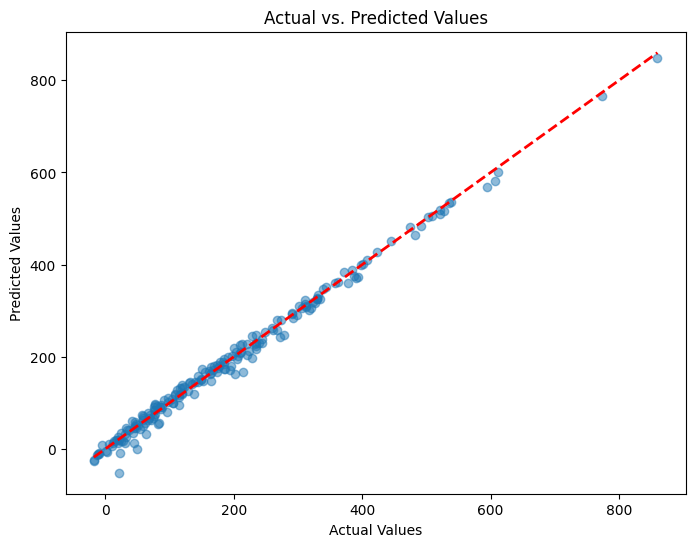

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

##IS IT BETTER WITH CROSS-VALIDATION ?

In [ ]:
cv_results = xgb.cv(
    param,
    dtrain,
    num_round,
    nfold=5,
    metrics={"rmse"},
    seed=0,
    callbacks=[xgb.callback.EvaluationMonitor(show_stdv=True)],
)

[0]	train-rmse:164.17998+6.75630	test-rmse:162.97634+26.37776
[1]	train-rmse:150.59903+6.22690	test-rmse:149.76947+25.31818
[2]	train-rmse:138.16236+5.66525	test-rmse:137.80143+24.72925
[3]	train-rmse:126.91618+5.14695	test-rmse:127.41065+24.46178
[4]	train-rmse:116.68835+4.79679	test-rmse:117.42356+23.29260
[5]	train-rmse:107.38861+4.35302	test-rmse:108.39067+23.58467
[6]	train-rmse:98.99610+4.02475	test-rmse:100.14848+22.80194
[7]	train-rmse:91.30581+3.76009	test-rmse:92.24864+21.97622
[8]	train-rmse:84.35577+3.46613	test-rmse:85.26247+21.26185
[9]	train-rmse:78.07201+3.21684	test-rmse:79.57496+20.87571
[10]	train-rmse:72.35763+2.98164	test-rmse:73.86099+20.15141
[11]	train-rmse:67.23031+2.75531	test-rmse:69.17978+19.56393
[12]	train-rmse:62.52604+2.56959	test-rmse:64.56597+18.76666
[13]	train-rmse:58.24572+2.36924	test-rmse:60.28199+18.15071
[14]	train-rmse:54.38942+2.20140	test-rmse:56.63992+17.73473
[15]	train-rmse:50.87402+2.07958	test-rmse:53.49211+17.44652
[16]	train-rmse:47.70

In [ ]:
best_round = cv_results['test-rmse-mean'].idxmin()
# Entraîner le modèle final avec le nombre optimal d'arbres
bst_crossv = xgb.train(params=param,dtrain=dtrain,num_boost_round=best_round)

# Faire des prédictions
dtest = xgb.DMatrix(X_test)
ypred = bst_crossv.predict(dtest)

In [ ]:
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.329257993921637
Mean Squared Error: 197.73149202587774
R-squared: 0.9920477061947552


No, it isn't better.

In [ ]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()